In [1]:
import pandas as pd

# select the data for businesses
businesses = pd.read_csv('csv_data/yelp_academic_dataset_business.csv')

In [12]:
from yelp_functions import filter_by_category
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def analyze_competition(businesses_df, chain_name, category):

    # filter the dataframe to restaurants in the same category
    category_dataframe = filter_by_category(businesses_df, category)

    # select restaurants in cities with at least 3 stores of the chain
    chain_dataframe = category_dataframe[category_dataframe['name'] == chain_name]
    cities_with_chain = chain_dataframe.groupby('city').count().reset_index()
    cities_with_chain = cities_with_chain[cities_with_chain['name'] >= 3]
    cities_with_chain = cities_with_chain['city'].tolist()
    category_dataframe = category_dataframe[category_dataframe['city'].isin(cities_with_chain)]

    # get mean chain's rating per city
    mean_chain_rating = chain_dataframe.groupby('city').mean().reset_index()
    mean_chain_rating = mean_chain_rating[['city', 'stars']]
    mean_chain_rating.columns = ['city', 'mean_chain_rating']

    # create a new dataframe with the number of competitors per city
    competitors_count = category_dataframe.groupby('city').count().reset_index()[['city', 'name']]
    competitors_count.columns = ['city', 'competitors_count']

    # merge the dataframes
    mean_chain_rating = mean_chain_rating.merge(competitors_count, on='city')

    # create log for the count column
    mean_chain_rating['log_competitors_count'] = np.log10(mean_chain_rating['competitors_count'])

    # plot data to visualize the relationship between the variables
    sns.set_style('white')
    sns.regplot(data=mean_chain_rating, x='log_competitors_count', y='mean_chain_rating', color=(1.0, 0.6, 0.6))
    plt.title(chain_name)
    plt.savefig(f'figures/{chain_name}_competition.png', dpi=200)
    plt.show()

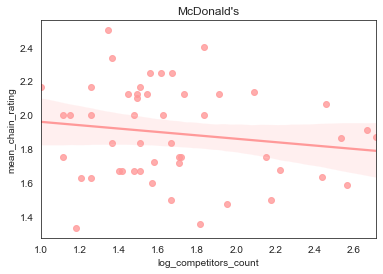

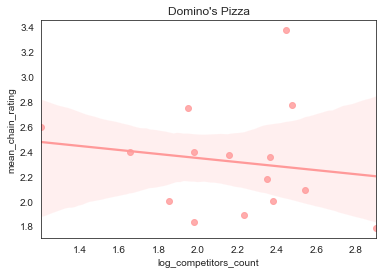

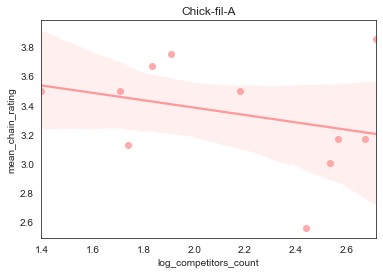

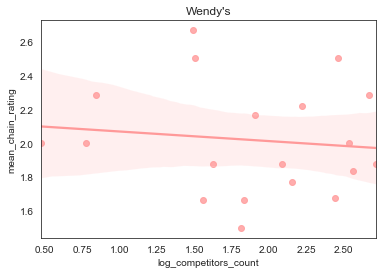

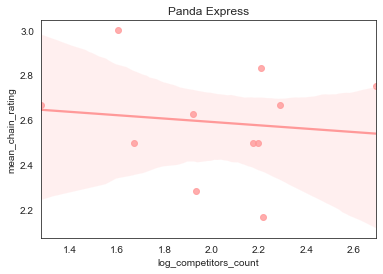

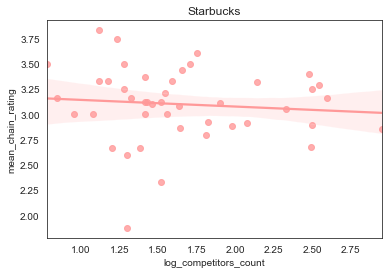

In [17]:
chains = ["McDonald's", "Domino's Pizza", "Chick-fil-A", "Wendy's", "Panda Express", "Starbucks"]
categories = ["Fast Food", "Pizza", "Fast Food", "Fast Food", "Chinese", "Coffee & Tea"]

for chain, chain_category in zip(chains, categories):
    analyze_competition(businesses, chain, chain_category)